<a href="https://colab.research.google.com/github/r9hit10/Netflix-Data-Analysis/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("netflix.csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Since the "cast" column is nested
# unnesting the "cast" shall help in analysing "cast" and its relationships with other columns

In [5]:
data["new_cast"]=data["cast"].str.split(", ")

In [6]:
data=data.explode("new_cast")

In [7]:
data.drop("cast",axis=1,inplace=True)

In [8]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,new_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [9]:
data.rename(columns={"new_cast":"cast"},inplace=True)

In [10]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [11]:
# Similarly, since the "listed_in" column is nested
# unnesting the "listed_in" shall help in analysing "listed_in" and its relationships with other columns

In [12]:
data["listed_in"]=data["listed_in"].str.split(", ")

In [13]:
data=data.explode("listed_in")

In [14]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [15]:
data["country"]

,country
0,United States
1,South Africa
1,South Africa
1,South Africa
1,South Africa
...,...
8806,India
8806,India
8806,India
8806,India


In [16]:
# chceking for any nesting in "country" column using the Lambda Function

In [17]:
data[data["country"].apply(lambda x : "," in str(x))]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",Oyafunmike Ogunlano
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s...",Oyafunmike Ogunlano
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,International Movies,Recovering alcoholic Talal wakes up inside a s...,Mansoor Alfeeli
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,Thrillers,Recovering alcoholic Talal wakes up inside a s...,Mansoor Alfeeli
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...,Ahd
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,International Movies,Recovering alcoholic Talal wakes up inside a s...,Ahd


In [18]:
data["country"]=data["country"].str.split(", ")

In [19]:
data=data.explode("country")

In [20]:
data["country"]=data["country"].str.split(", ")

In [21]:
data.explode("country")

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
8806,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish
8806,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy
8806,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy


In [22]:
data=data.explode("country")

In [23]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [24]:
# Splitting Directors

In [25]:
data["director"]=data["director"].str.split(", ")

In [26]:
data=data.explode("director")

In [27]:
data.loc[data["country"]=="Angola"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
2087,s2088,Movie,Santana,Chris Roland,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Paulo Americano
2087,s2088,Movie,Santana,Maradona Dias Dos Santos,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Paulo Americano
2087,s2088,Movie,Santana,Chris Roland,Angola,"August 28, 2020",2020,TV-MA,107 min,International Movies,Two brothers — one a narcotics agent and the o...,Paulo Americano
2087,s2088,Movie,Santana,Maradona Dias Dos Santos,Angola,"August 28, 2020",2020,TV-MA,107 min,International Movies,Two brothers — one a narcotics agent and the o...,Paulo Americano
2087,s2088,Movie,Santana,Chris Roland,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Raul Rosario
2087,s2088,Movie,Santana,Maradona Dias Dos Santos,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Raul Rosario
2087,s2088,Movie,Santana,Chris Roland,Angola,"August 28, 2020",2020,TV-MA,107 min,International Movies,Two brothers — one a narcotics agent and the o...,Raul Rosario
2087,s2088,Movie,Santana,Maradona Dias Dos Santos,Angola,"August 28, 2020",2020,TV-MA,107 min,International Movies,Two brothers — one a narcotics agent and the o...,Raul Rosario
2087,s2088,Movie,Santana,Chris Roland,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Rapulana Seiphemo
2087,s2088,Movie,Santana,Maradona Dias Dos Santos,Angola,"August 28, 2020",2020,TV-MA,107 min,Action & Adventure,Two brothers — one a narcotics agent and the o...,Rapulana Seiphemo


In [28]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [29]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [30]:
# Filling Directors with Null Values

In [31]:
dir_mod=data.groupby("country").apply(lambda x: x["director"].mode()).reset_index()

In [32]:
dir_mod.drop("level_1",axis=1,inplace=True)

In [33]:
dir_mod.head()

,country,director
0,,Najwa Najjar
1,Afghanistan,Pieter-Jan De Pue
2,Albania,Antonio Morabito
3,Algeria,Youssef Chahine
4,Angola,Chris Roland


In [34]:
data=data.merge(dir_mod,on="country",how="left")

In [35]:
data.head()

,show_id,type,title,director_x,country,date_added,release_year,rating,duration,listed_in,description,cast,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,Martin Scorsese
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
2,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
3,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
4,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Adze Ugah


In [36]:
data["director_x"].fillna(data["director_y"],inplace=True)

In [37]:
data.head()

,show_id,type,title,director_x,country,date_added,release_year,rating,duration,listed_in,description,cast,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,Martin Scorsese
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adze Ugah
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Adze Ugah


In [38]:
data.drop(["director_y"],axis=1,inplace=True)

In [39]:
data.rename(columns={"director_x":"director"},inplace=True)

In [40]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [41]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,5021
country,11897
date_added,158
release_year,0
rating,67
duration,3
listed_in,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215537 entries, 0 to 215536
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       215537 non-null  object
 1   type          215537 non-null  object
 2   title         215537 non-null  object
 3   director      210516 non-null  object
 4   country       203640 non-null  object
 5   date_added    215379 non-null  object
 6   release_year  215537 non-null  int64 
 7   rating        215470 non-null  object
 8   duration      215534 non-null  object
 9   listed_in     215537 non-null  object
 10  description   215537 non-null  object
 11  cast          213299 non-null  object
dtypes: int64(1), object(11)
memory usage: 19.7+ MB


In [43]:
country_director_best_pair=data.groupby("director").apply(lambda x : x["country"].mode()).reset_index()
country_director_best_pair

,director,level_1,country
0,A. L. Vijay,0,India
1,A. Raajdheep,0,India
2,A. Salaam,0,India
3,A.R. Murugadoss,0,India
4,Aadish Keluskar,0,India
...,...,...,...
5740,Éric Warin,1,France
5741,Ísold Uggadóttir,0,Belgium
5742,Óskar Thór Axelsson,0,Iceland
5743,Ömer Faruk Sorak,0,Turkey


In [44]:
country_director_best_pair.drop("level_1",axis=1,inplace=True)

In [45]:
country_director_best_pair

,director,country
0,A. L. Vijay,India
1,A. Raajdheep,India
2,A. Salaam,India
3,A.R. Murugadoss,India
4,Aadish Keluskar,India
...,...,...
5740,Éric Warin,France
5741,Ísold Uggadóttir,Belgium
5742,Óskar Thór Axelsson,Iceland
5743,Ömer Faruk Sorak,Turkey


In [46]:
data2=data

In [47]:
data2=data2.merge(country_director_best_pair,on="director",how="left")

In [48]:
data2.head()

,show_id,type,title,director,country_x,date_added,release_year,rating,duration,listed_in,description,cast,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,United States
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa


In [49]:
data2["country_x"].fillna(data2["country_y"],inplace=True)

In [50]:
data2.head()

,show_id,type,title,director,country_x,date_added,release_year,rating,duration,listed_in,description,cast,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,United States
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa


In [51]:
data2.drop(["country_y"],axis=1,inplace=True)
data2.rename(columns={"country_x":"country"},inplace=True)

In [52]:
data2.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [53]:
data2.isnull().sum()

,0
show_id,0
type,0
title,0
director,5021
country,9203
date_added,158
release_year,0
rating,67
duration,3
listed_in,0


In [54]:
best_cast=data.groupby("director").apply(lambda x : x["cast"].mode()).reset_index()

In [55]:
best_cast.drop(columns="level_1",axis=1,inplace=True)

In [56]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [57]:
best_cast.head()

,director,cast
0,A. L. Vijay,G.V. Prakash Kumar
1,A. L. Vijay,Hema
2,A. L. Vijay,Joy Mathew
3,A. L. Vijay,Munishkanth
4,A. L. Vijay,Murli Sharma


In [58]:
data=data.merge(best_cast,how="left",on="director")

In [59]:
data["cast_x"].fillna(data["cast_y"],inplace=True)

In [60]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast_x,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Adesua Etomi
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Angela Sithole
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Ayo Makun
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Celeste Ntuli


In [61]:
data.rename(columns={"cast_x":"cast"},inplace=True)

In [62]:
data.drop(columns="cast_y",inplace=True)

In [63]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata


In [64]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,5021
country,59673
date_added,158
release_year,0
rating,109
duration,3
listed_in,0


In [65]:
data.drop_duplicates(inplace=True)

In [66]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
14,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
27,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
40,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [67]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,5021
country,11949
date_added,158
release_year,0
rating,67
duration,3
listed_in,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205517 entries, 0 to 1394649
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       205517 non-null  object
 1   type          205517 non-null  object
 2   title         205517 non-null  object
 3   director      200496 non-null  object
 4   country       193568 non-null  object
 5   date_added    205359 non-null  object
 6   release_year  205517 non-null  int64 
 7   rating        205450 non-null  object
 8   duration      205514 non-null  object
 9   listed_in     205517 non-null  object
 10  description   205517 non-null  object
 11  cast          204121 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.4+ MB


In [69]:
data.dropna(inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192137 entries, 1 to 1394649
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       192137 non-null  object
 1   type          192137 non-null  object
 2   title         192137 non-null  object
 3   director      192137 non-null  object
 4   country       192137 non-null  object
 5   date_added    192137 non-null  object
 6   release_year  192137 non-null  int64 
 7   rating        192137 non-null  object
 8   duration      192137 non-null  object
 9   listed_in     192137 non-null  object
 10  description   192137 non-null  object
 11  cast          192137 non-null  object
dtypes: int64(1), object(11)
memory usage: 19.1+ MB


In [71]:
def shows(duration,type):
  if type=="TV Show":
    seasons= int(duration.split()[0])
    return seasons*10*45
  else:
    return int(duration.split()[0])

In [72]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata
14,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata
27,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata
40,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema
53,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema


In [73]:
data["dur_min"]=data.apply(lambda x: shows(x["duration"],x["type"]),axis=1 )

In [74]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast,dur_min
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
14,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
27,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
40,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
53,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [75]:
data.drop(columns="duration",inplace=True)

In [76]:
data.rename(columns={"dur_min":"duration"},inplace=True)

In [77]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
14,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
27,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
40,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
53,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [78]:
data.tail(25)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
1394456,s8806,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,Comedies,"Dragged from civilian life, a former superhero...",Kevin Zegers,88
1394465,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Dramas,A scrappy but poor boy worms his way into a ty...,Vicky Kaushal,111
1394473,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,International Movies,A scrappy but poor boy worms his way into a ty...,Vicky Kaushal,111
1394481,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Vicky Kaushal,111
1394489,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Dramas,A scrappy but poor boy worms his way into a ty...,Sarah-Jane Dias,111
1394497,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,International Movies,A scrappy but poor boy worms his way into a ty...,Sarah-Jane Dias,111
1394505,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Sarah-Jane Dias,111
1394513,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Dramas,A scrappy but poor boy worms his way into a ty...,Raaghav Chanana,111
1394521,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,International Movies,A scrappy but poor boy worms his way into a ty...,Raaghav Chanana,111
1394529,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Raaghav Chanana,111


In [79]:
data.reset_index(drop=True,inplace=True)

In [80]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
0,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [81]:
data2=data.copy()

In [82]:
TV=data.loc[data["type"]=="TV Show"]

In [83]:
Movie=data.loc[data["type"]=="Movie"]

In [84]:
TV.tail()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
192010,s8801,TV Show,Zindagi Gulzar Hai,Meenu Gaur,Pakistan,"December 15, 2016",2012,TV-PG,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,450
192011,s8801,TV Show,Zindagi Gulzar Hai,Afia Nathaniel,Pakistan,"December 15, 2016",2012,TV-PG,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,450
192012,s8801,TV Show,Zindagi Gulzar Hai,Ahsan Rahim,Pakistan,"December 15, 2016",2012,TV-PG,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,450
192013,s8801,TV Show,Zindagi Gulzar Hai,Farjad Nabi,Pakistan,"December 15, 2016",2012,TV-PG,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,450
192014,s8801,TV Show,Zindagi Gulzar Hai,Meenu Gaur,Pakistan,"December 15, 2016",2012,TV-PG,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",Hina Khawaja Bayat,450


In [85]:
Movie.tail()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
192132,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,International Movies,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,111
192133,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,111
192134,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Dramas,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,111
192135,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,International Movies,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,111
192136,s8807,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,111


In [86]:
#Trend of number of Movies released per year changed over the last 20-30 years

In [87]:
data["release_year"]=pd.to_datetime(data["release_year"], format='%Y')

In [88]:
data["release_year"]=data["release_year"].dt.year

In [89]:
data_movies=data[data["type"]=="Movie"]

In [90]:
Movies=data_movies[["title","release_year"]]

In [91]:
Movies.duplicated().sum()

133728

In [92]:
Movies=Movies.drop_duplicates()

In [93]:
Movies["title"].value_counts()

,count
title,
Sankofa,1
Beyond All Boundaries,1
Big Fat Liar,1
Big Daddy,1
Big Bear,1
...,...
100 Things to do Before High School,1
Oththa Seruppu Size 7,1
Minimalism: A Documentary About the Important Things,1


In [94]:
Movies.loc[Movies.duplicated()]

,title,release_year


In [95]:
Movies.groupby("release_year")["title"].count().sort_values(ascending=False)

,title
release_year,
2017,674
2018,667
2016,585
2019,527
2020,428
...,...
1961,1
1963,1
1966,1


In [96]:
#maximum Movies were released in 2017

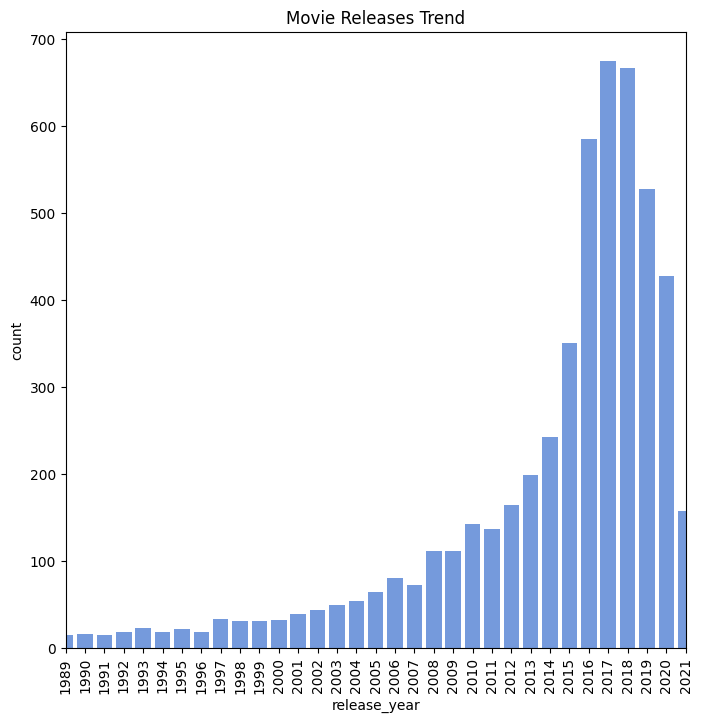

In [97]:
plt.figure(figsize=(8,8))
sns.countplot(data=Movies,x="release_year",color="cornflowerblue")
plt.title("Movie Releases Trend")
plt.xlim("1989", "2021")
plt.xticks(rotation=90)
plt.show()

In [98]:
# trend shows that there is a gradual rise in Movies release on Netflix with its peak 2017 followed by a swift decline in 2019
# possibly a result of onset of Covid-19 outbreak

In [99]:
data_tv=data[data["type"]=="TV Show"]

In [100]:
TV=data_tv[["title","release_year"]]

In [101]:
TV.duplicated().sum()

50785

In [102]:
TV=TV.drop_duplicates()

In [103]:
TV["title"].value_counts()

,count
title,
Blood & Water,1
Under Arrest,1
The Frankenstein Chronicles,1
Dragons: Race to the Edge,1
Everything Sucks!,1
...,...
ChuChu TV Nursery Rhymes & Kids Songs (Hindi),1
The Midnight Gospel,1
Cooked with Cannabis,1


In [104]:
TV["release_year"].value_counts()

,count
release_year,
2020,382
2019,343
2018,320
2017,232
2021,207
2016,197
2015,136
2014,81
2013,55


In [105]:
TV.head()

,title,release_year
0,Blood & Water,2021
57,Kota Factory,2021
225,The Great British Baking Show,2021
299,Dear White People,2021
315,Falsa identidad,2020


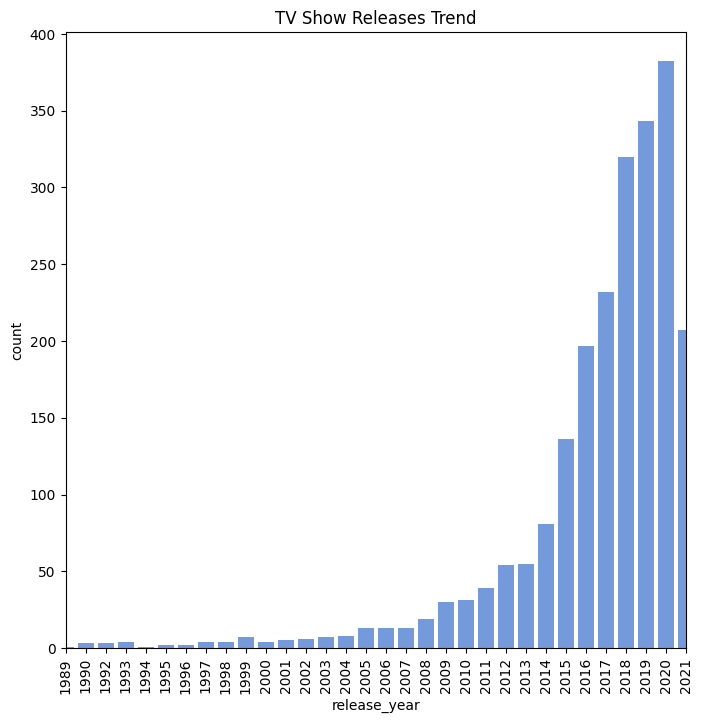

In [106]:
plt.figure(figsize=(8,8))
sns.countplot(data=TV,x="release_year",color="cornflowerblue")
plt.title("TV Show Releases Trend")
plt.xlim("1989", "2021")
plt.xticks(rotation=90)
plt.show()
#

In [107]:
Movies2=Movies.groupby("release_year")["title"].count().reset_index()

In [108]:
Movies2.head()

,release_year,title
0,1942,2
1,1943,3
2,1944,2
3,1945,2
4,1946,1


In [109]:
Movies2.sort_values("title",ascending=False)

,release_year,title
68,2017,674
69,2018,667
67,2016,585
70,2019,527
71,2020,428
...,...,...
12,1961,1
14,1963,1
17,1966,1
5,1947,1


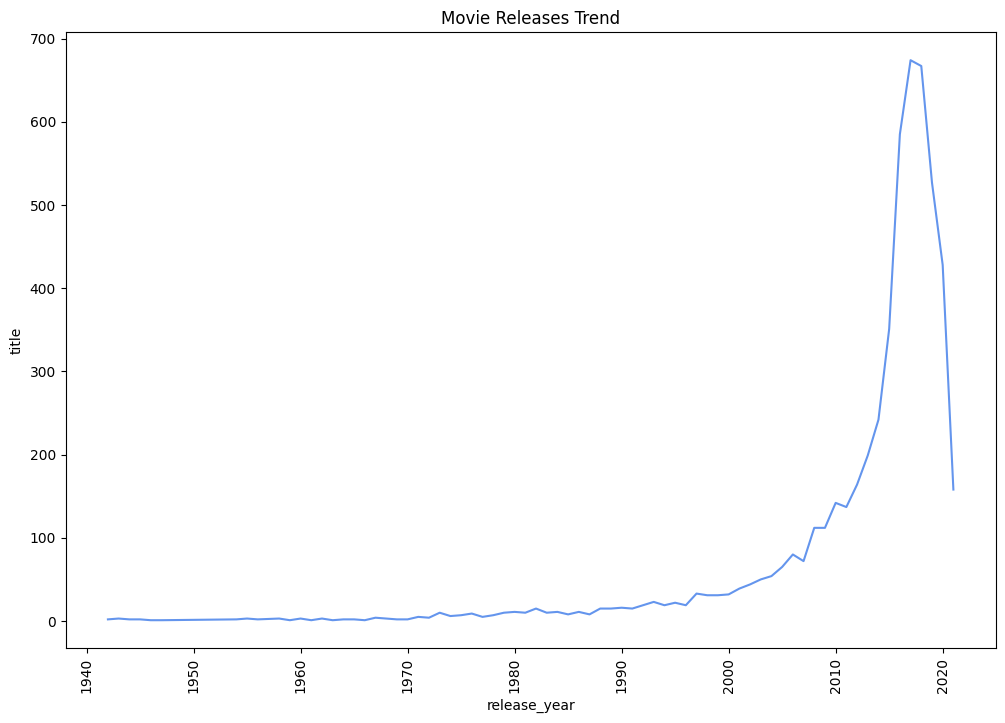

In [110]:
plt.figure(figsize=(12,8))
sns.lineplot(x="release_year",y="title",data=Movies2,color="cornflowerblue")
plt.title("Movie Releases Trend")
plt.xticks(rotation=90)
plt.show()

In [111]:
TV2=TV.groupby("release_year")["title"].count().reset_index()

In [112]:
TV2.head()

,release_year,title
0,1945,1
1,1963,1
2,1967,1
3,1972,1
4,1974,1


In [113]:
TV2.sort_values("title",ascending=False)

,release_year,title
41,2020,382
40,2019,343
39,2018,320
38,2017,232
42,2021,207
37,2016,197
36,2015,136
35,2014,81
34,2013,55
33,2012,54


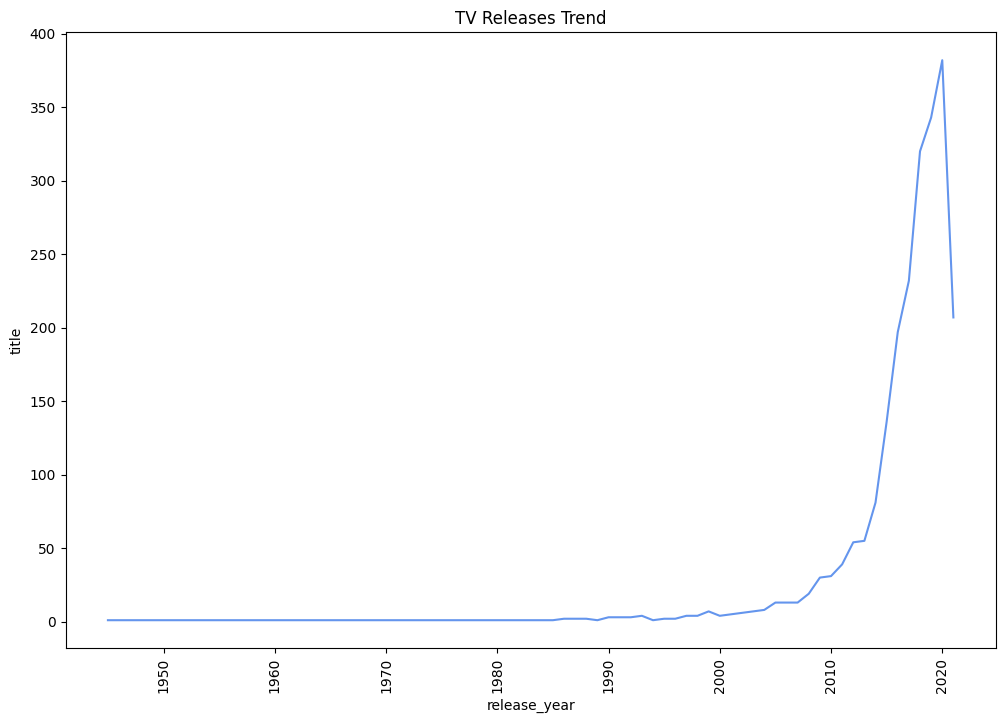

In [114]:
plt.figure(figsize=(12,8))
sns.lineplot(x="release_year",y="title",data=TV2,color="cornflowerblue")
plt.title("TV Releases Trend")
plt.xticks(rotation=90)
plt.show()

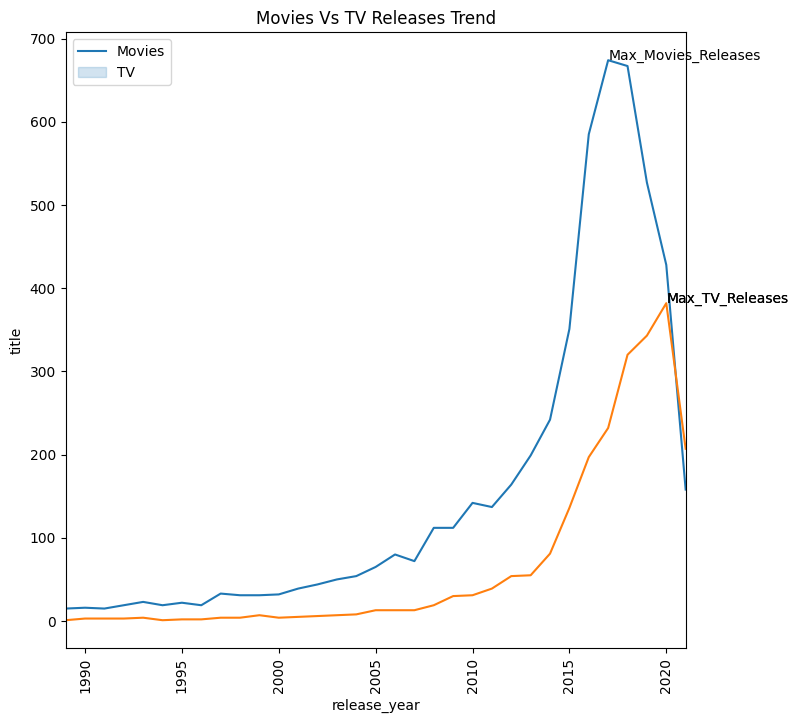

In [115]:
plt.figure(figsize=(8,8))
sns.lineplot(x="release_year",y="title",data=Movies2)
sns.lineplot(x="release_year",y="title",data=TV2)
plt.title("Movies Vs TV Releases Trend")
plt.legend(["Movies","TV"])
plt.text(2020,max(TV2["title"]),"Max_TV_Releases")
plt.text(2017,max(Movies2["title"]),"Max_Movies_Releases")
plt.text(2020,max(TV2["title"]),"Max_TV_Releases")
plt.xlim(1989,2021)
plt.xticks(rotation=90)
plt.show()

In [116]:
# From above line graphe we can observe that there is growing trend in number title releases for both Movies and TV Shows
# And we can see that after 2017 there is a downward slope in Movie Release whereas TV releases are still on up
#this trend shows that Netflix is focussing more on TV Series Releases in recent times

In [117]:
#Best time to add Movies on Netflix

In [118]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
0,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,"September 24, 2021",2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [119]:
data["date_added"]=pd.to_datetime(data["date_added"],format="mixed")

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192137 entries, 0 to 192136
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       192137 non-null  object        
 1   type          192137 non-null  object        
 2   title         192137 non-null  object        
 3   director      192137 non-null  object        
 4   country       192137 non-null  object        
 5   date_added    192137 non-null  datetime64[ns]
 6   release_year  192137 non-null  int32         
 7   rating        192137 non-null  object        
 8   listed_in     192137 non-null  object        
 9   description   192137 non-null  object        
 10  cast          192137 non-null  object        
 11  duration      192137 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 16.9+ MB


In [121]:
Movie_Releases=data.loc[data["type"]=="Movie"]

In [122]:
Movie_Releases=Movie_Releases[["title","date_added"]].reset_index()

In [123]:
Movie_Releases.drop("index",axis=1,inplace=True)

In [124]:
Movie_Releases.head()

,title,date_added
0,Sankofa,2021-09-24
1,Sankofa,2021-09-24
2,Sankofa,2021-09-24
3,Sankofa,2021-09-24
4,Sankofa,2021-09-24


In [125]:
Movie_Releases["Month"]=Movie_Releases["date_added"].dt.month

In [126]:
Movie_Releases.head()

,title,date_added,Month
0,Sankofa,2021-09-24,9
1,Sankofa,2021-09-24,9
2,Sankofa,2021-09-24,9
3,Sankofa,2021-09-24,9
4,Sankofa,2021-09-24,9


In [127]:
Movie_Releases.drop_duplicates(inplace=True)

In [128]:
Movie_Releases=Movie_Releases.reset_index()

In [129]:
Movie_Releases.drop("index",axis=1,inplace=True)

<Axes: xlabel='Month', ylabel='count'>

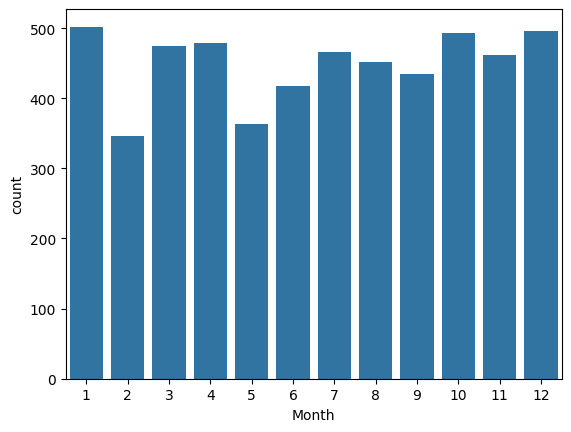

In [130]:
sns.countplot(data=Movie_Releases,x="Month")

In [131]:
# From the graph it can be observed that the last quarter has most number movie releases
# We can conclude that October-January seems like a good time to add Movies on Netflix.
# AS it is a period of multiple Fesitvals and Occassions like "Christmas","Diwali","Halloween"
# more viewers are expected to enjoy holidays by watching movies

In [132]:
Movies_in=data[["title","listed_in","type","release_year"]]

In [133]:
Movies_in=Movies_in.loc[Movies_in["type"]=="Movie"]

In [134]:
Movies_in.loc[Movies_in.duplicated()]

,title,listed_in,type,release_year
82,Sankofa,Dramas,Movie,1993
83,Sankofa,Dramas,Movie,1993
84,Sankofa,Dramas,Movie,1993
85,Sankofa,Dramas,Movie,1993
86,Sankofa,Dramas,Movie,1993
...,...,...,...,...
192132,Zubaan,International Movies,Movie,2015
192133,Zubaan,Music & Musicals,Movie,2015
192134,Zubaan,Dramas,Movie,2015
192135,Zubaan,International Movies,Movie,2015


In [135]:
Movies_in=Movies_in.drop_duplicates()

In [136]:
Movies_in.head()

,title,listed_in,type,release_year
81,Sankofa,Dramas,Movie,1993
87,Sankofa,Independent Movies,Movie,1993
93,Sankofa,International Movies,Movie,1993
233,The Starling,Comedies,Movie,2021
234,The Starling,Dramas,Movie,2021


In [137]:
Top_Movie_Genres=Movies_in.groupby(["listed_in"])["release_year"].count().sort_values(ascending=False).reset_index().head(10)

In [138]:
Top_Movie_Genres

,listed_in,release_year
0,International Movies,2423
1,Dramas,2312
2,Comedies,1579
3,Action & Adventure,814
4,Independent Movies,745
5,Romantic Movies,588
6,Thrillers,549
7,Children & Family Movies,527
8,Documentaries,501
9,Horror Movies,338


In [139]:
Top10_Movie_Genres=Top_Movie_Genres["listed_in"].values

In [140]:
Top10_Movie_Genres

array(['International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       'Independent Movies', 'Romantic Movies', 'Thrillers',
       'Children & Family Movies', 'Documentaries', 'Horror Movies'],
      dtype=object)

In [141]:
# Following are the top 10 Genres that Netflix Focusses on releasing on its Platform
#'International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
#'Independent Movies', 'Romantic Movies', 'Thrillers',
#'Children & Family Movies', 'Documentaries', 'Horror Movies'

In [142]:
# How has the number of movies and TV shows added to Netflix changed over the years?

In [143]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
0,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [144]:
data.shape

(192137, 12)

In [145]:
Movies =data.loc[data["type"]=="Movie"]

In [146]:
Movies.duplicated().sum()

0

In [147]:
Movies[["release_year","title"]].duplicated().sum()

133728

In [148]:
Movies=Movies[["release_year","title"]].drop_duplicates().reset_index(drop=True)

In [149]:
Movies.head()

,release_year,title
0,1993,Sankofa
1,2021,The Starling
2,2021,Je Suis Karl
3,1998,Jeans
4,2010,Grown Ups


In [150]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5385 entries, 0 to 5384
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  5385 non-null   int32 
 1   title         5385 non-null   object
dtypes: int32(1), object(1)
memory usage: 63.2+ KB


In [151]:
Movies

,release_year,title
0,1993,Sankofa
1,2021,The Starling
2,2021,Je Suis Karl
3,1998,Jeans
4,2010,Grown Ups
...,...,...
5380,2015,Zinzana
5381,2007,Zodiac
5382,2009,Zombieland
5383,2006,Zoom


In [152]:
Movies_trend=Movies.groupby("release_year")["title"].apply(lambda x: x.count()).reset_index()

In [153]:
Movies_trend.head()

,release_year,title
0,1942,2
1,1943,3
2,1944,2
3,1945,2
4,1946,1


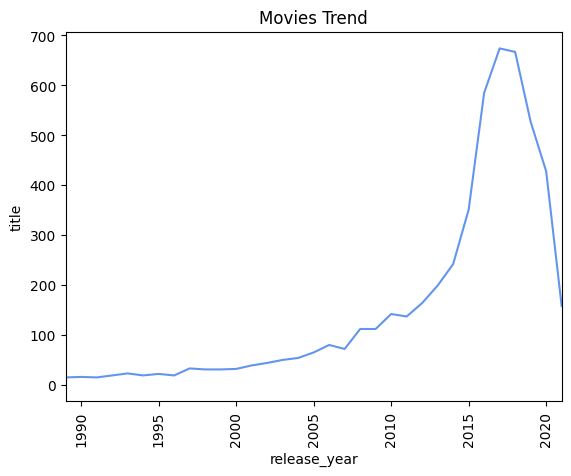

In [154]:
sns.lineplot(x="release_year",y="title",data=Movies_trend,color="cornflowerblue")
plt.title("Movies Trend")
plt.xlim(1989,2021)
plt.xticks(rotation=90)
plt.show()

In [155]:
#Geographical Insights:

In [156]:
#Which countries produce the most content on Netflix?

In [157]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
0,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [158]:
data_country=data[["title","country"]].drop_duplicates().reset_index(drop=True)

In [159]:
data_country["country"].value_counts().head(5).reset_index()

,country,count
0,United States,3481
1,India,1027
2,United Kingdom,754
3,Canada,427
4,France,379


In [160]:
#Top 5 countries producing the most content on Netflix:
#United States,India,United Kingdom,Canada,France

In [161]:
# How does the genre distribution vary across different countries?


In [162]:
data_country_genre=data[["country","title","listed_in"]]

In [163]:
data_country_genre.duplicated()

,0
0,False
1,False
2,False
3,True
4,True
...,...
192132,True
192133,True
192134,True
192135,True


In [164]:
data_country_genre=data_country_genre.drop_duplicates().reset_index(drop=True)

In [165]:
data_country_genre

,country,title,listed_in
0,South Africa,Blood & Water,International TV Shows
1,South Africa,Blood & Water,TV Dramas
2,South Africa,Blood & Water,TV Mysteries
3,India,Kota Factory,International TV Shows
4,India,Kota Factory,Romantic TV Shows
...,...,...,...
21146,United States,Zoom,Children & Family Movies
21147,United States,Zoom,Comedies
21148,India,Zubaan,Dramas
21149,India,Zubaan,International Movies


In [166]:
data_country_genre=data_country_genre.groupby(["country","listed_in"]).count().reset_index()

In [167]:
data_country_genre.head()

,country,listed_in,title
0,,Dramas,1
1,,Independent Movies,1
2,,International Movies,1
3,,International TV Shows,1
4,,TV Dramas,1


In [168]:
top_data_country_genre=data_country_genre.sort_values(["title","country"],ascending=False)

In [169]:
top_data_country_genre

,country,listed_in,title
505,India,International Movies,851
1304,United States,Dramas,832
1299,United States,Comedies,680
501,India,Dramas,662
1292,United States,Action & Adventure,404
...,...,...,...
0,,Dramas,1
1,,Independent Movies,1
2,,International Movies,1
3,,International TV Shows,1


In [170]:
# Top 2 most watched Genres based on releases in US is Comedies and Dramas
# India Top 2 releases International Movies,Dramas

In [171]:
#Director and Actor Insights:


In [172]:
# Who are the most prolific directors and actors on Netflix?


In [173]:
data_actor_director=data[["cast","director","title"]]

In [174]:
data_actor_director.duplicated()

,0
0,False
1,True
2,True
3,False
4,True
...,...
192132,True
192133,True
192134,False
192135,True


In [175]:
data_actor_director=data_actor_director.drop_duplicates()

In [176]:
data_actor_director.head()

,cast,director,title
0,Ama Qamata,Adze Ugah,Blood & Water
3,Khosi Ngema,Adze Ugah,Blood & Water
6,Gail Mabalane,Adze Ugah,Blood & Water
9,Thabang Molaba,Adze Ugah,Blood & Water
12,Dillon Windvogel,Adze Ugah,Blood & Water


In [177]:
data_actor_director_counts=data_actor_director.groupby(["director","cast"])["title"].count().reset_index()

In [178]:
top_5_dir_act=data_actor_director_counts.sort_values("title",ascending=False).head()

In [179]:
#Top 5 Director- Actor pair
top_5_dir_act

,director,cast,title
33476,Martin Scorsese,Grey Griffin,155
50078,Sarah Smith,David Attenborough,56
57923,Toshiya Shinohara,Takahiro Sakurai,24
12270,David Dhawan,Anupam Kher,24
55973,Thierry Donard,Wille Lindberg,19


In [180]:
# Is there a correlation between popular genres and specific directors or actors?


In [181]:
data_gen_tit_dir=data[["director","title","listed_in"]]

In [182]:
data_gen_tit_dir.head()

,director,title,listed_in
0,Adze Ugah,Blood & Water,International TV Shows
1,Adze Ugah,Blood & Water,TV Dramas
2,Adze Ugah,Blood & Water,TV Mysteries
3,Adze Ugah,Blood & Water,International TV Shows
4,Adze Ugah,Blood & Water,TV Dramas


In [183]:
data_gen_tit_dir.duplicated().sum()

172840

In [184]:
data_gen_tit_dir=data_gen_tit_dir.drop_duplicates().reset_index(drop=True)

In [185]:
data_gen_tit_dir.head()

,director,title,listed_in
0,Adze Ugah,Blood & Water,International TV Shows
1,Adze Ugah,Blood & Water,TV Dramas
2,Adze Ugah,Blood & Water,TV Mysteries
3,David Dhawan,Kota Factory,International TV Shows
4,David Dhawan,Kota Factory,Romantic TV Shows


In [186]:
data_gen_tit_dir.duplicated().sum()

0

In [187]:
data_gen_dir= data_gen_tit_dir.groupby(["director","listed_in"])["title"].count().reset_index()

In [188]:
data_gen_dir.head()

,director,listed_in,title
0,A. L. Vijay,Comedies,2
1,A. L. Vijay,Dramas,1
2,A. L. Vijay,International Movies,2
3,A. L. Vijay,Sci-Fi & Fantasy,1
4,A. Raajdheep,Dramas,1


In [189]:
data_top_gen_dir=data_gen_dir.sort_values("title",ascending=False).head()

In [190]:
#Top 5 Genres and Directors
data_top_gen_dir

,director,listed_in,title
6557,Martin Scorsese,TV Comedies,243
6558,Martin Scorsese,TV Dramas,222
6542,Martin Scorsese,Kids' TV,209
9272,Sarah Smith,British TV Shows,202
6537,Martin Scorsese,Docuseries,162


In [191]:
data_gen_tit_cast=data[["cast","title","listed_in"]]
data_gen_tit_cast.head()
data_gen_tit_cast.duplicated().sum()
data_gen_tit_cast=data_gen_tit_cast.drop_duplicates().reset_index(drop=True)

In [192]:
data_gen_tit_cast.head()

,cast,title,listed_in
0,Ama Qamata,Blood & Water,International TV Shows
1,Ama Qamata,Blood & Water,TV Dramas
2,Ama Qamata,Blood & Water,TV Mysteries
3,Khosi Ngema,Blood & Water,International TV Shows
4,Khosi Ngema,Blood & Water,TV Dramas


In [193]:
data_gen_tit_cast.duplicated().sum()

0

In [194]:
data_gen_cast= data_gen_tit_cast.groupby(["cast","listed_in"])["title"].count().reset_index()

In [195]:
data_gen_cast.head()

,cast,listed_in,title
0,Jr.,Comedies,1
1,Jr.,TV Dramas,1
2,"""Riley"" Lakdhar Dridi",Comedies,1
3,"""Riley"" Lakdhar Dridi",Dramas,1
4,"""Riley"" Lakdhar Dridi",International Movies,1


In [196]:
data_top_gen_cast=data_gen_cast.sort_values("title",ascending=False).head()

In [197]:
#Top 5 Genres and Actors

data_top_gen_cast

,cast,listed_in,title
34748,Grey Griffin,Docuseries,84
23063,David Attenborough,British TV Shows,42
34754,Grey Griffin,Reality TV,41
8352,Anupam Kher,International Movies,40
23067,David Attenborough,Docuseries,37


In [198]:
#Content Popularity:

In [199]:
#Which movies or TV shows are most frequently categorized under multiple genres?


In [200]:
Movies=data.loc[data["type"]=="Movie"]

In [201]:
Movies.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
81,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,125
82,s8,Movie,Sankofa,Haile Gerima,Ghana,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,125
83,s8,Movie,Sankofa,Haile Gerima,Burkina Faso,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,125
84,s8,Movie,Sankofa,Haile Gerima,United Kingdom,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,125
85,s8,Movie,Sankofa,Haile Gerima,Germany,2021-09-24,1993,TV-MA,Dramas,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,125


In [202]:
Movies=Movies[["title","listed_in"]].drop_duplicates().reset_index(drop=True)

In [203]:
Movies.head()

,title,listed_in
0,Sankofa,Dramas
1,Sankofa,Independent Movies
2,Sankofa,International Movies
3,The Starling,Comedies
4,The Starling,Dramas


In [204]:
Movies_genre_count=Movies.groupby("title")["listed_in"].count().reset_index()

In [205]:
Movies_genre_count.head()

,title,listed_in
0,#Alive,3
1,#AnneFrank - Parallel Stories,2
2,#FriendButMarried,3
3,#FriendButMarried 2,3
4,#Roxy,2


In [206]:
# Top 5 movies most frequently categorized under multiple genres
Movies_genre_count.sort_values("listed_in",ascending=False).head()

,title,listed_in
0,#Alive,3
2760,Matichya Chuli,3
2767,May You Prosper,3
2770,Maya Memsaab,3
2772,Maza Pati Karodpati,3


In [207]:
TVs=data.loc[data["type"]=="TV Show"]
TVs.head()

,show_id,type,title,director,country,date_added,release_year,rating,listed_in,description,cast,duration
0,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
1,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
2,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Ama Qamata,900
3,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900
4,s2,TV Show,Blood & Water,Adze Ugah,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,900


In [208]:
TVs=TVs[["title","listed_in"]].drop_duplicates().reset_index(drop=True)

In [209]:
TVs.head()

,title,listed_in
0,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
2,Blood & Water,TV Mysteries
3,Kota Factory,International TV Shows
4,Kota Factory,Romantic TV Shows


In [210]:
TVs_genre_count=TVs.groupby("title")["listed_in"].count().reset_index()

In [211]:
# Top 5 TV Shows most frequently categorized under multiple genres
TVs_genre_count.sort_values("listed_in",ascending=False).head().reset_index(drop=True)

,title,listed_in
0,MeatEater,3
1,My Sassy Girl,3
2,Nadiya Bakes,3
3,NSU German History X,3
4,NCIS,3
